<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/gun(multiple_categories)(%E1%84%80%E1%85%A9%E1%84%8C%E1%85%AE%E1%86%AB%E1%84%89%E1%85%AE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#multiple categories gun
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xp2OlmobAQMlFGrRu9rO")
project = rf.workspace().project("multiple2")
dataset = project.version(1).download("yolov5")


     |████████████████████████████████| 145 kB 14.5 MB/s 
     |████████████████████████████████| 178 kB 54.3 MB/s 
     |████████████████████████████████| 1.1 MB 45.0 MB/s 
     |████████████████████████████████| 138 kB 53.6 MB/s 
     |████████████████████████████████| 596 kB 65.1 MB/s 
     |████████████████████████████████| 62 kB 961 kB/s 
  Created wheel for roboflow: filename=roboflow-0.1.8-py3-none-any.whl size=20082 sha256=22fdeca6f7bf1355e7bb73c4af8c70e7e2696bfcb36db80727a19fca7f3a397e
  Stored in directory: /root/.cache/pip/wheels/db/11/cc/728f5aaa27dd0a16f49c73090f1ef72ba4701c4c0999eba381
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=b47d51255d21779fd48cf6b306c758bfed7ed600098979b045a1e098140fd3f3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to multiple2-1 in yolov5pytorch:: 100%|██████████| 4286/4286 [00:02<00:00, 1620.86it/s]


In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 9966, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 9966 (delta 15), reused 18 (delta 9), pack-reused 9928
Receiving objects: 100% (9966/9966), 10.34 MiB | 10.76 MiB/s, done.
Resolving deltas: 100% (6897/6897), done.


In [3]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5


In [ ]:
%cat /content/dataset/data.yaml

cat: /content/dataset/data.yaml: No such file or directory


In [4]:
%cd /
from glob import glob

img_list=glob('/content/multiple2-1/train/images/*.jpg')

# gun_img_list = glob('/content/gun_train/images/*.jpg')
# knife_img_list= glob('/content/knife_train/train/images/*.jpg')
# spanner_img_list= glob('/content/spanner_train/images/*.jpg')



/


In [5]:
# # all_img_list=[]
# # for i in gun_img_list:
# #     all_img_list.append(i)
# # for i in knife_img_list:
# #     all_img_list.append(i)
# # for i in spanner_img_list:
# #     all_img_list.append(i)
    
# print(len(all_img_list))

print(len(img_list))

2140


In [7]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

1712 428


In [8]:
with open('/content/multiple2-1/train/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/multiple2-1/train/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [9]:
import yaml

with open('/content/multiple2-1/multiple_data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/content/multiple2-1/train/train.txt'
data['val'] = '/content/multiple2-1/train/val.txt'

with open('/content/multiple2-1/multiple_data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['Axe', 'Chisel', 'Gun', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'Spanner', 'SupplymentaryBattery'], 'nc': 12, 'train': 'multiple2-1/train/images', 'val': 'multiple2-1/valid/images'}
{'names': ['Axe', 'Chisel', 'Gun', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'Spanner', 'SupplymentaryBattery'], 'nc': 12, 'train': '/content/multiple2-1/train/train.txt', 'val': '/content/multiple2-1/train/val.txt'}


# 데이터 학습
## epoch 50 인데 result.png 보면서 loss 적당할때까지 늘리셔도 됩니다. 오래걸려요

In [10]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 50 --data /content/multiple2-1/multiple_data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name multiple_yolov5s_results

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/multiple2-1/multiple_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=multiple_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

In [ ]:
from IPython.display import Image
import os

val_img_path = '/content/yolov5/multiple2-1/train/images/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg'

!python detect.py --weights /content/yolov5/runs/train/all_yolov5s_results/weights/last.pt --img 416 --conf 0.5 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/inference/output', os.path.basename(val_img_path)))

detect: weights=['/content/yolov5/runs/train/all_yolov5s_results/weights/last.pt'], source=/content/yolov5/multiple2-1/train/images/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/multiple2-1/train/images/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg: 416x416 2 Guns, Done. (0.007s)
Speed: 0.3ms pre-process, 6.7ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/ex

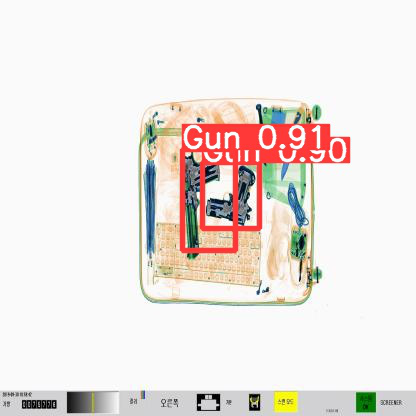

In [ ]:
image = Image.open("/content/yolov5/runs/detect/exp5/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg")
image

# 동영상 적용 코드
## abc.mp4 는 구글드라이브 엑스레이 동영상을 변경한 것입니다.
### 다 되면 runs/detect/에 저장되어있습니다.

In [14]:
!python detect.py --source /content/multiple2-1/abc.mp4 --weights /content/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt

detect: weights=['/content/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt'], source=/content/multiple2-1/abc.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-94-g47fac9f torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
video 1/1 (1/1675) /content/multiple2-1/abc.mp4: 384x640 Done. (0.011s)
video 1/1 (2/1675) /content/multiple2-1/abc.mp4: 384x640 Done. (0.007s)
video 1/1 (3/1675) /content/multiple2-1/abc.mp4: 384x640 Done. (0.007s)
video 1/1 (4/1675) /content/multiple2-1/abc.mp4: 384x640 Done. (0.006s)
video 1/1 (5/1675) /content/multiple2-1/abc.mp4: 384x